fukuoka
총 단어 수 : 17038
중복없는 단어 수 : 4213
단어빈도순정렬 : 


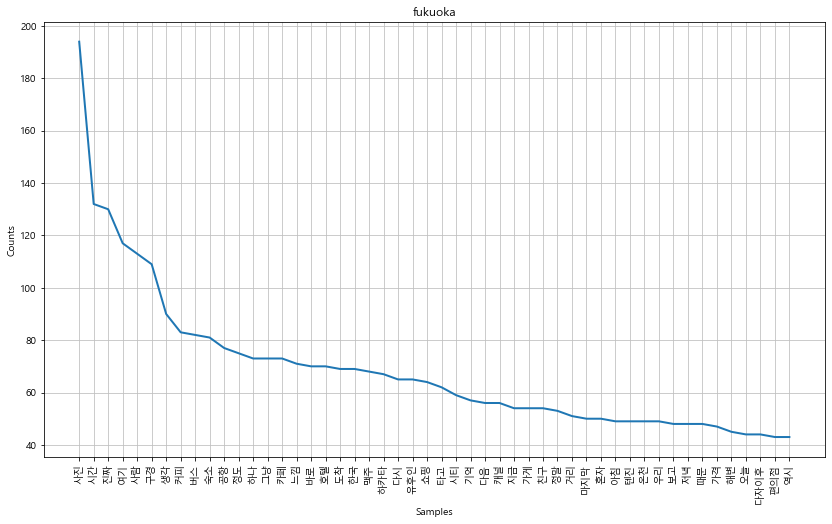

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/airplain.jfif'

In [17]:
import re, time, requests, json
import numpy as np
import pandas as pd
from tqdm import tqdm

import nltk 
from konlpy.corpus import kobill
from konlpy.tag import Okt
okt = Okt()

from PIL import Image
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud, STOPWORDS


city_list = ['bangkok','cebu','danang','fukuoka','hanoi','hongkong','osaka','sapporo','taipei','tokyo']

for city in city_list[3:4]:     ######
    print(city)    

    #데이터전처리
    df = pd.read_csv('C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/travel_csv/'+city+'_blog_crawling.csv', header=None)
    df.rename(columns= {0:'title', 1:'URL', 2:'day', 3:'body'}, inplace=True)
    
    text = ''
    for i in range(1,90):         #한 도시의 90개 글 모두 한 문장안에 통합
        text = text + df['body'][i]

    #명사 분리.
    tokens_ko=okt.nouns(text)   
#'.', '(', '0', ',', "'", '%', '-', 'X', '),', ').',
    #불용어제거
    stop_words = ['방콕','세부','다낭','후쿠오카','하노이','홍콩','오사카','삿포로','타이페이','도쿄','대만','필리핀','베트남','일본','중국','태국','여행','타이베이','있는','이','그','잘','못','ㅋㅋ','ㅎㅎ','홍콩의','홍콩이','지옥','포기','후회','모양','비현실적']
    tokens_ko = [each_word for each_word in tokens_ko if (each_word not in stop_words)&(len(each_word) !=1)]
    tokens_ko

    #빈출단어 카운트
    ko=nltk.Text(tokens_ko, name=city)
    print('총 단어 수 : ' + str(len(ko.tokens))) #총 단어 수
    print('중복없는 단어 수 : ' + str(len(set(ko.tokens)))) #중복없는 단어 수
    print('단어빈도순정렬 : ')
    ko.vocab()  #단어 빈도순 정렬
    

    #워드그래프
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~') 
    %matplotlib inline
    plt.figure(figsize=(14,8))
    plt.title(city)
    ko.plot(50)
    plt.show()

    #워드클라우드
    data = ko.vocab().most_common(200) #단어갯수 조절
    airplain_mask=np.array(Image.open("C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/airplain.jfif"))
    wc=WordCloud(font_path='c:\windows\Fonts\malgun.ttf',background_color='white', relative_scaling=0.2,
                 stopwords=stop_words, mask=airplain_mask).generate_from_frequencies(dict(data))
    plt.figure(figsize=(20,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(city)
    plt.show()

In [17]:
#특정 단어 수가 몇번 나오는지 서칭하고싶다면
ko.count('방콕')    

0

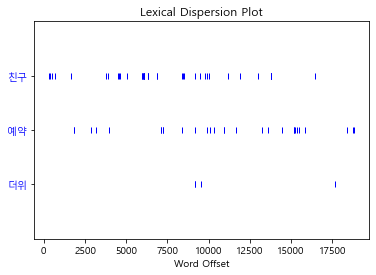

In [18]:
#등장문장 시각화
plt.figure()
ko.dispersion_plot(['친구','예약','더위'])

In [20]:
#특정 단어가 들어간 문장 찾기
for i in text.split('.'):
    if '걱정' in i:
        print(i)
        print()

 치케 전맛 …근데 너무 세마이라 코로나 좀 걱정됐움  ˃̣̣̥᷄⌓˂̣̣̥᷅ ​​ ​​여긴 하이타이드 스토어 ! 걍 기여븐 거 구경만 하고 나옴귀여운데 개창렬이다 ㅇㅂㅇ;;;​​ ​미도라 규뉴 기욤기욤​​ ​여긴 케키나 디저트 중심 카페지만 

뭔가 비싸기도 하고 불편하기도 하고 위생도 걱정되었기 때문인듯합니다

※​​  ​후쿠오카에서의 세번째 날이 날은 지하철을 많이 이용할 예정이어서친구의 추천으로 1일 승차권을 구입했어요!니시테츠는 못 타는거고일반 후쿠오카 지하철을 하루종일 무제한으로이용할 수 있는 티켓이에요!지하철에 있는 승차권 사는 기계에서 구입할 수 있고640엔(약 6400원)입니다​  ​조금 이 날은 피곤해서천천히 아침을 시작했어요 ㅋㅋㅋㅋ하카타 역에 있는 유명한 크로와상 가게'일 포노 델 미뇽' 을 왔어요!생각보다 줄이 길어서 당황했어요 ㅋㅋㅋㅋㅋㅋ​예전에 후쿠오카 여행왔을때하카타역에서 맛있게 먹었던 기억이 있어서구입하러 왔어요 ㅎㅎ케냥이는 고구마 맛 먹고싶다해서다음 날 같이 도쿄로 돌아오기 때문에사주려고 구입하러 왔어요 ㅋㅋㅋ친구한테도 주려고 해서플레인맛, 초코맛, 고구마 맛을각각 5개씩 구입했어용 ㅋㅋㅋㅋ​ ​바로 고구마 맛 크로와상을 먹었어요!역시 존맛 ㅠㅠㅠㅠㅠㅠㅠㅠ사실 도쿄 이케부쿠로에도 생기기는 했는데이케부쿠로는 정말 갈 일이 없어섴ㅋㅋㅋㅋㅋㅋㅋㅋ​  이 날은 카페 투어를 하기로 결정했어요!저는 카페 투어를 굉장히 좋아하거든욬ㅋㅋㅋ후쿠오카 여행을 다녀온 후배에게 추천 받은야쿠인에 있는 "No coffee"라는 곳을 갑니다!​야쿠인에는아기자기한 카페가 정말 많이있어요ㅠㅠㅠ행복한 곳​ 천천히 산책하면서 걷는데도쿄랑은 또 풍경이 다르니까너무 예쁘게 느껴지고설레고 그랬어요 ㅎㅎ​  역에서 좀 떨어져 있는 No coffee생각보다 규모가 작았어요!천천히 먹고 쉬었다 가려고 했는데후딱 마시고 가야하는 분위기다들 차로 와서 테이크아웃해서떠나는 분위기더라구용 ㅋㅋㅋㅋ각게 안은 회색 인테리어로 깔끔하고 좋았어요​  ​No coffee는굿즈가 유명한지굿즈

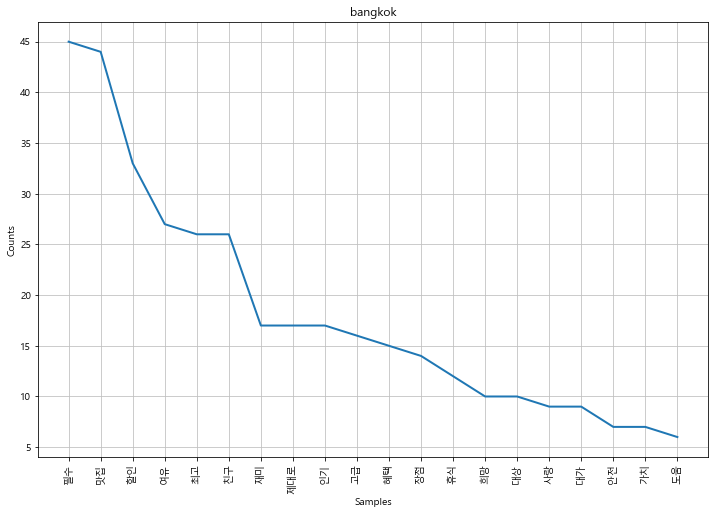

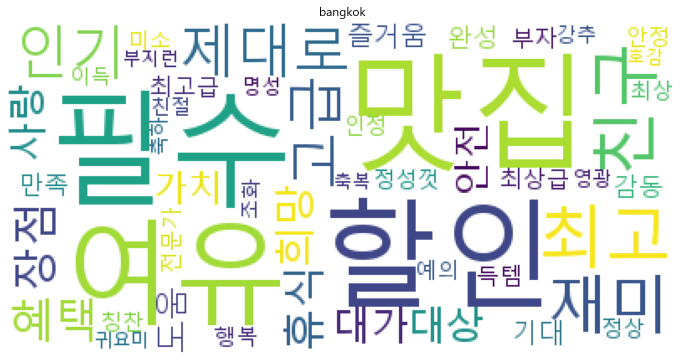

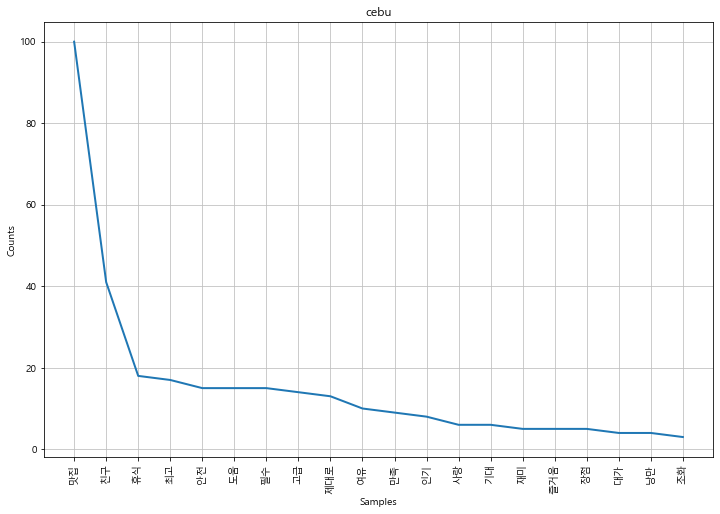

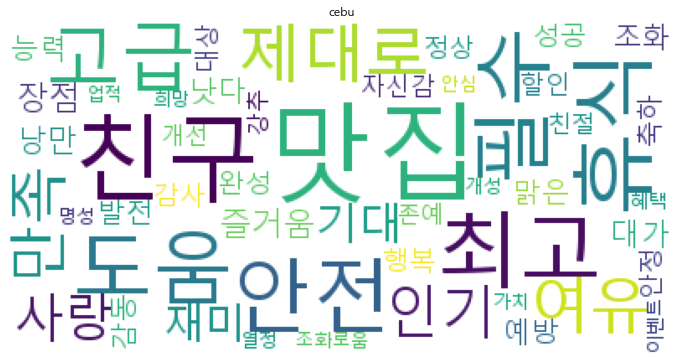

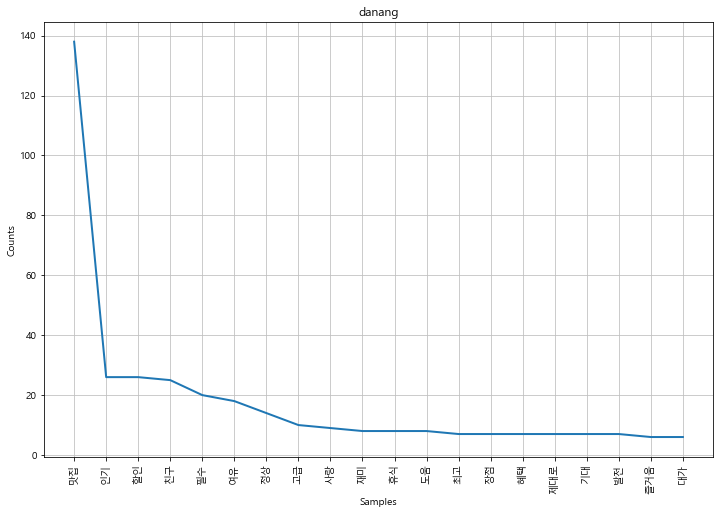

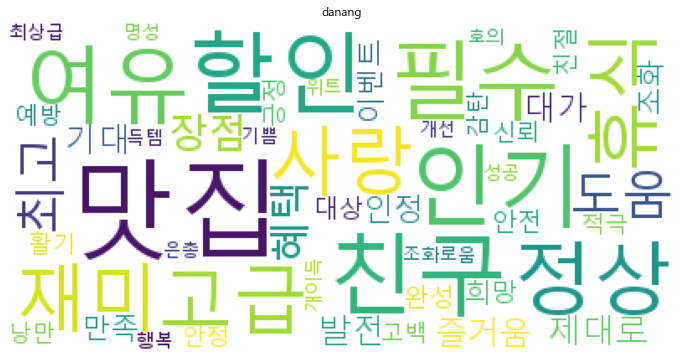

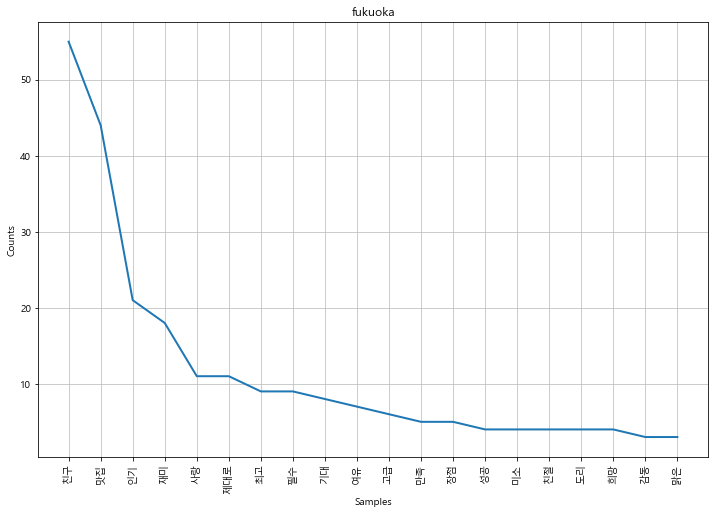

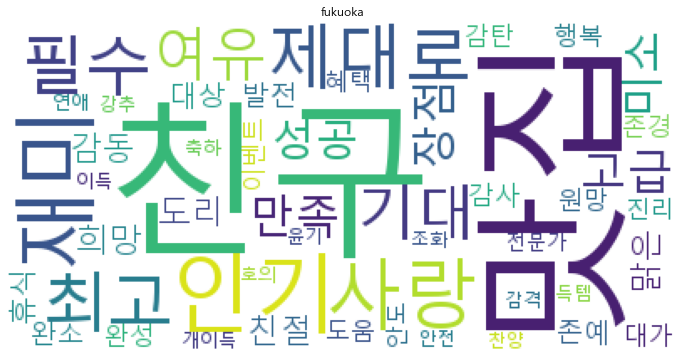

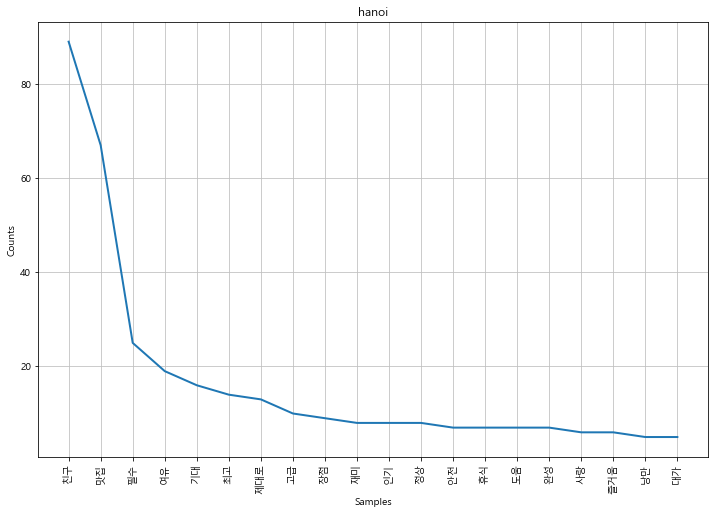

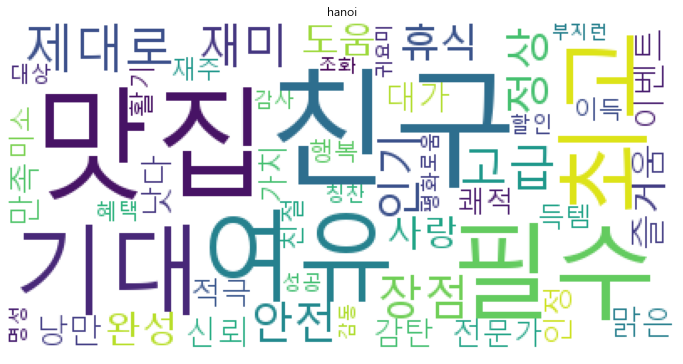

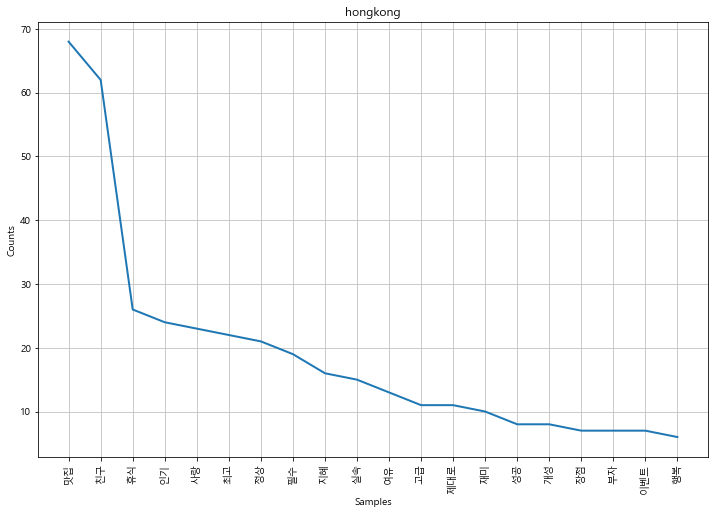

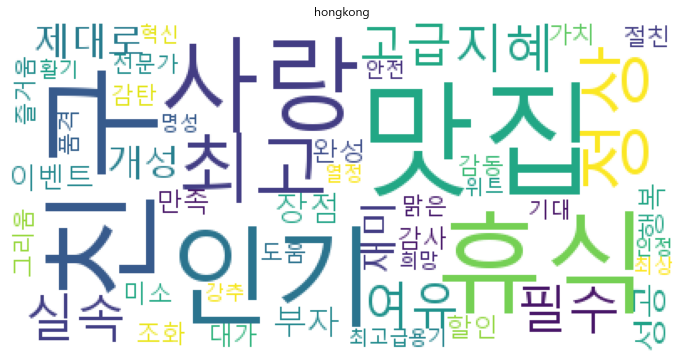

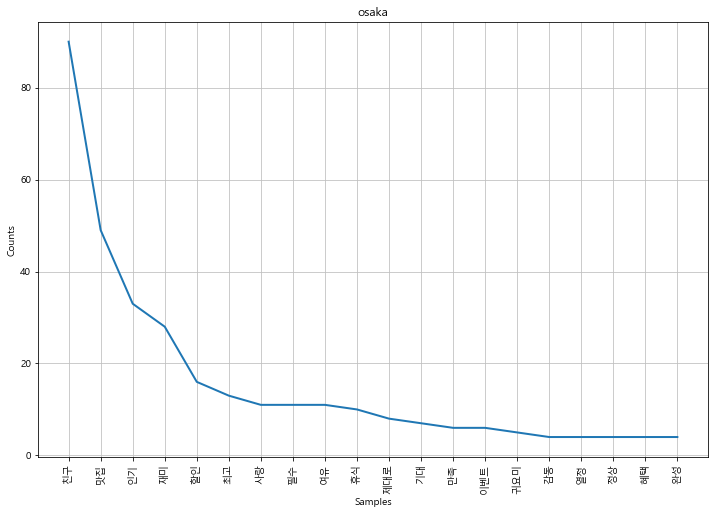

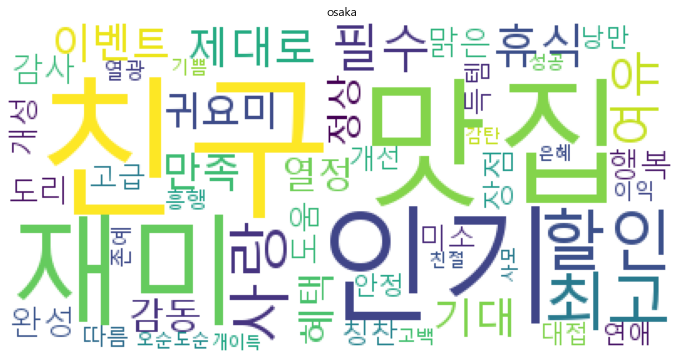

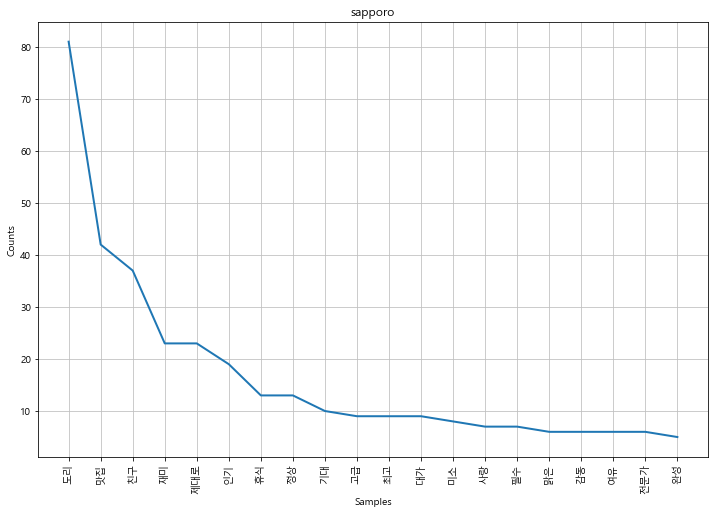

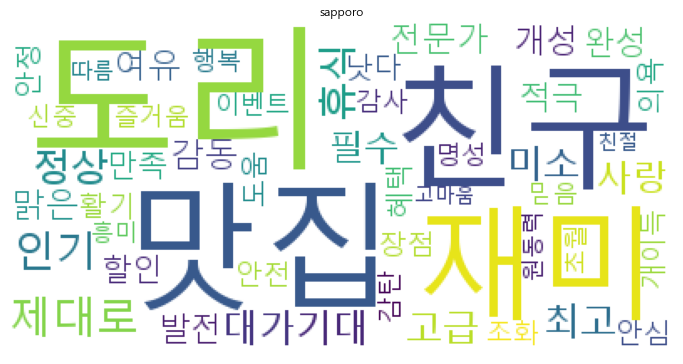

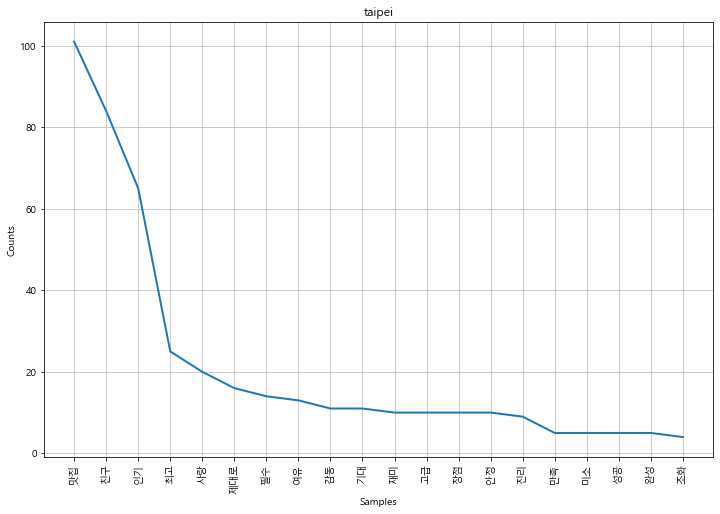

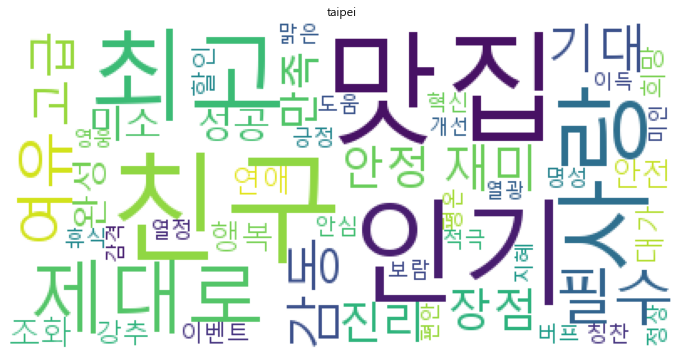

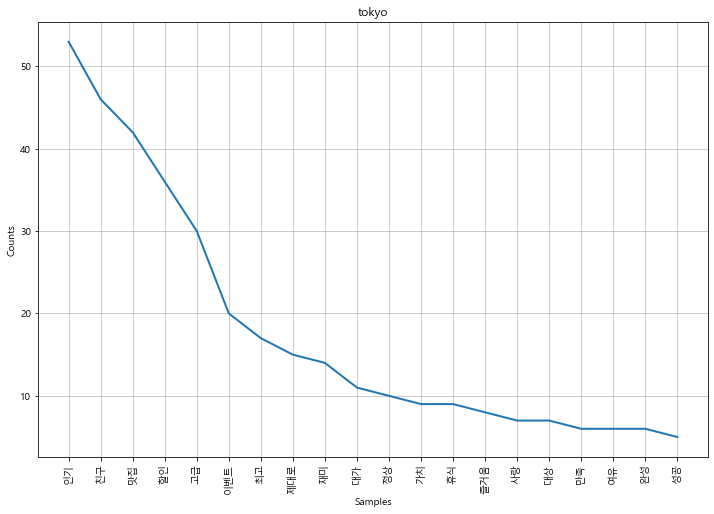

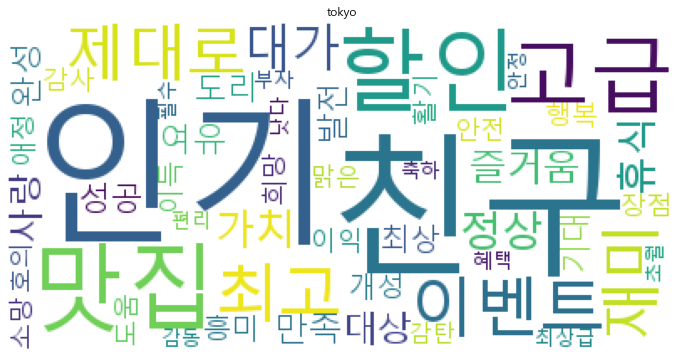

In [10]:
#긍정단어
df = pd.read_csv('C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/도시별_긍부정지수_및_긍부정단어목록/긍부정단어목록.csv')

for n in range(10):
    text = str(df.iloc[:,:5]['score_two_word'][n])+str(df.iloc[:,:4]['score_one_word'][n])  #
    tokens_ko=okt.nouns(text)
    tokens_ko
    ko=nltk.Text(tokens_ko, name=city)

    plt.figure(figsize=(12,8))
    plt.title(city_list[n])
    ko.plot(20)
    plt.show()

    #워드클라우드
    data = ko.vocab().most_common(50) #단어갯수 조절
    #airplain_mask=np.array(Image.open("C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/airplain.jfif"))
    wc=WordCloud(font_path='c:\windows\Fonts\malgun.ttf',background_color='white', relative_scaling=0.2,
                 stopwords=stop_words).generate_from_frequencies(dict(data))
    plt.figure(figsize=(12,8))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(city_list[n])
    #plt.show()

In [15]:
stop_words = ['방콕','세부','다낭','후쿠오카','하노이','홍콩','오사카','삿포로','타이페이','도쿄','대만','필리핀','베트남','일본','중국','태국','여행','타이베이','있는','이','그','잘','못','ㅋㅋ','ㅎㅎ','홍콩의','홍콩이','지옥','포기','후회','모양',' 모양''모양 ','비현실적','모 양',' 모 양','모 양 ']

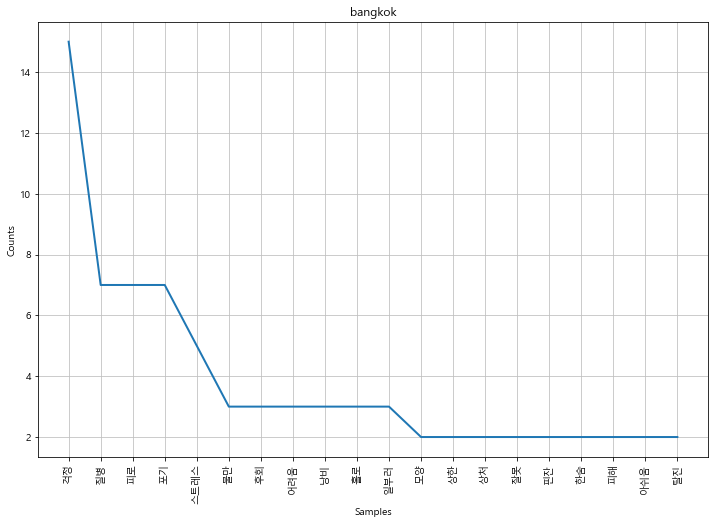

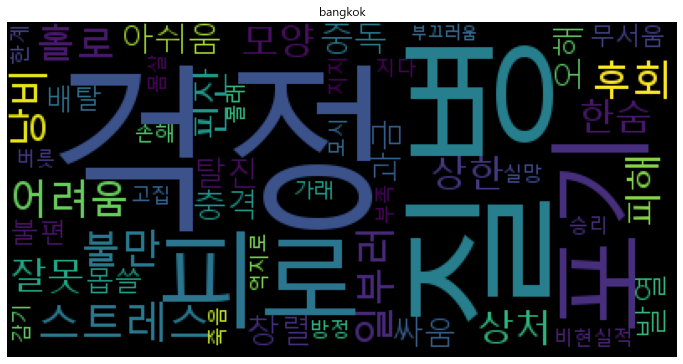

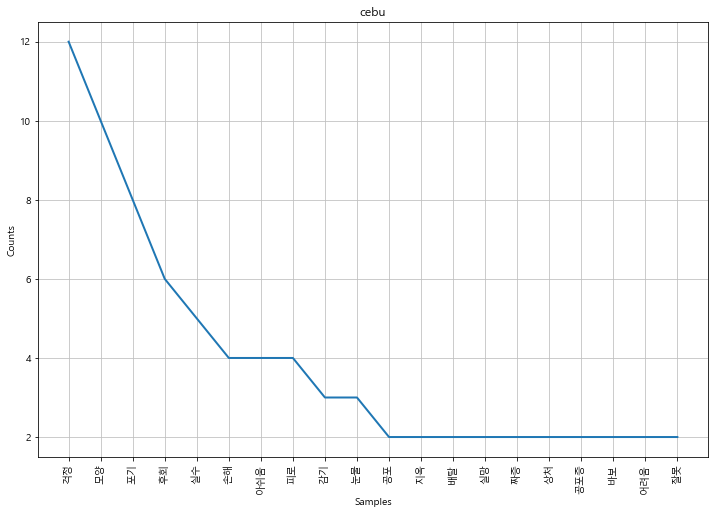

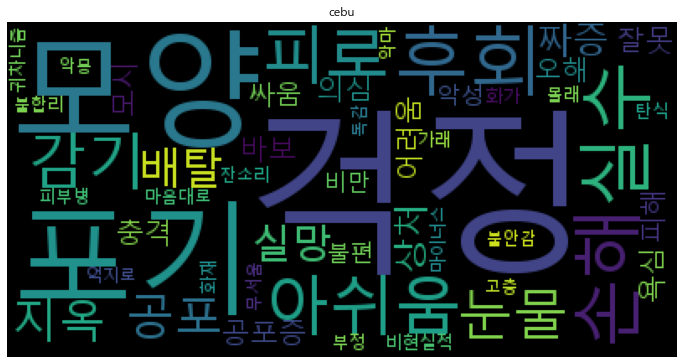

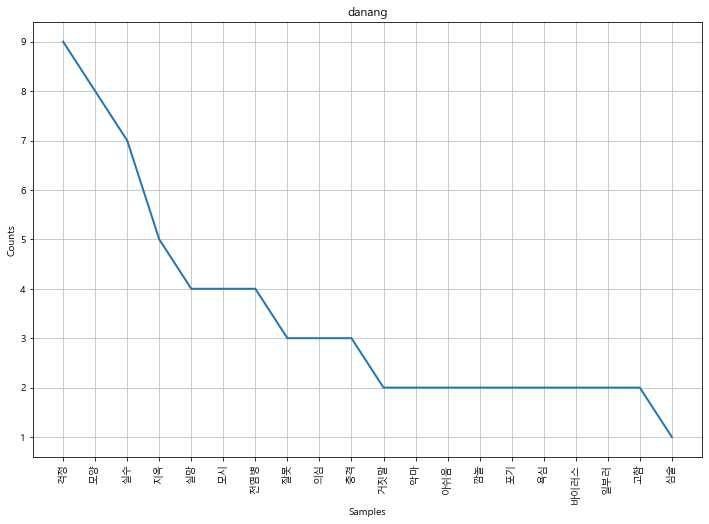

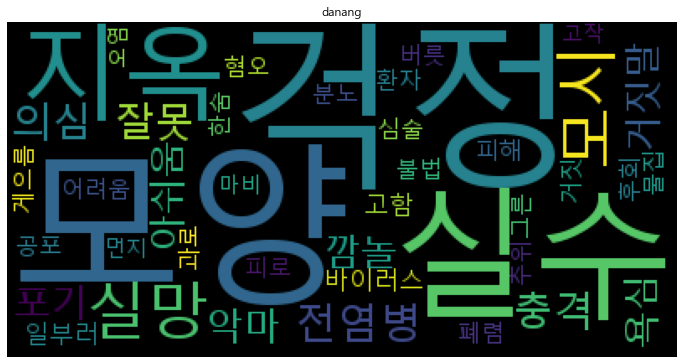

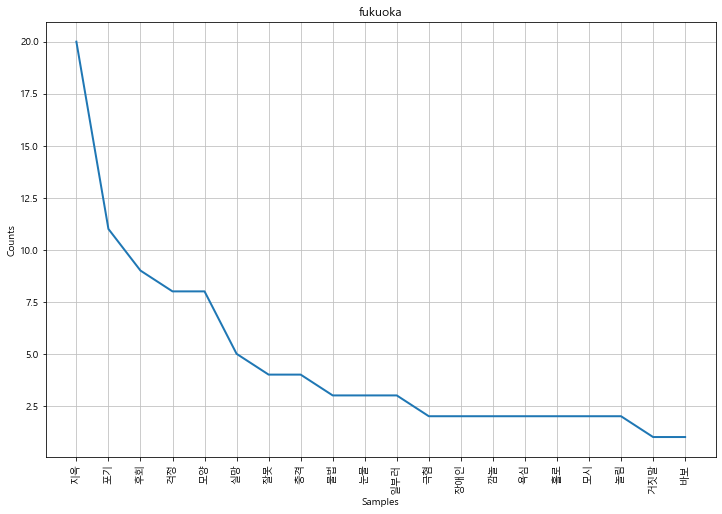

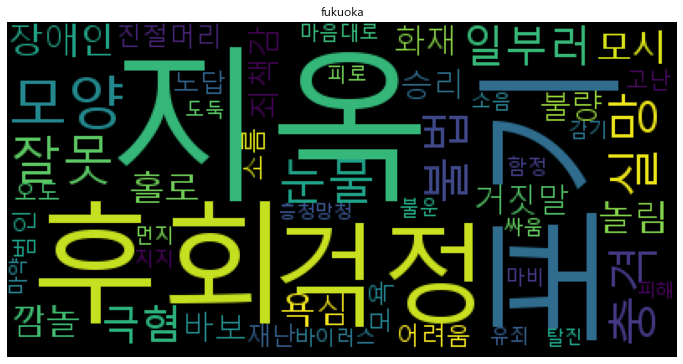

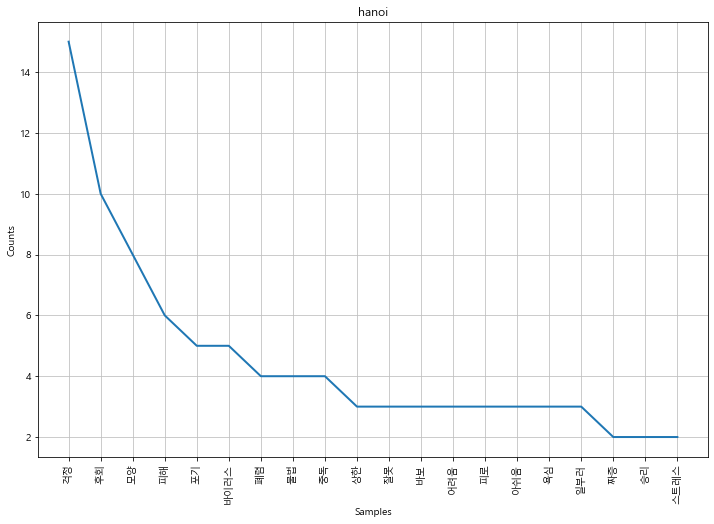

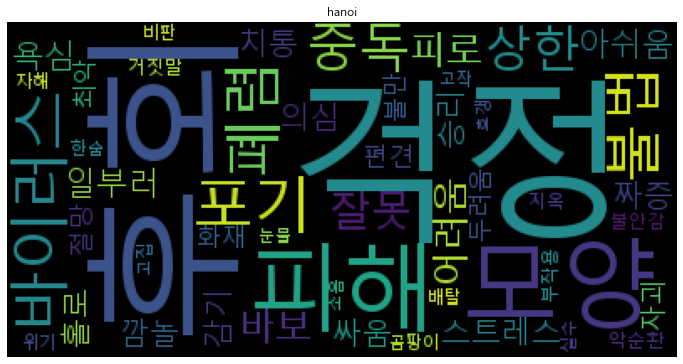

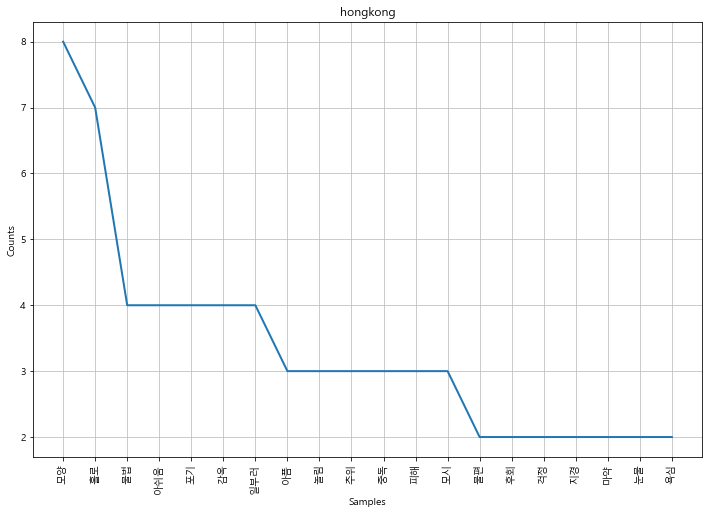

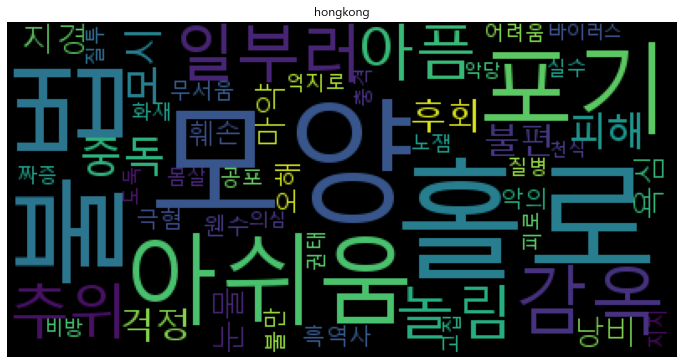

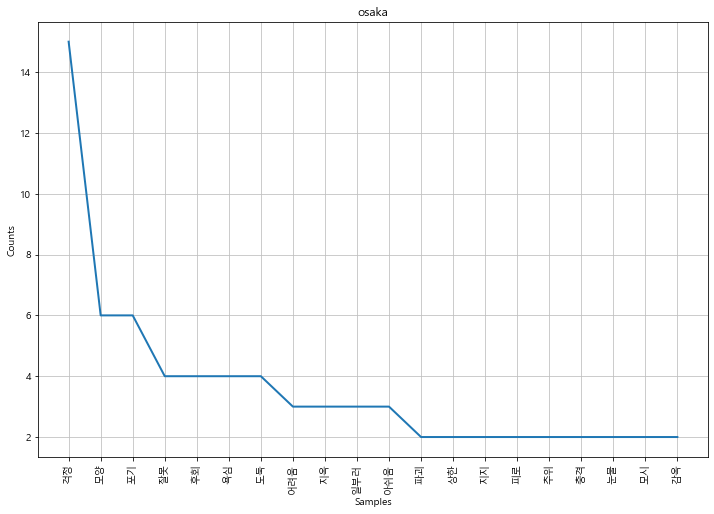

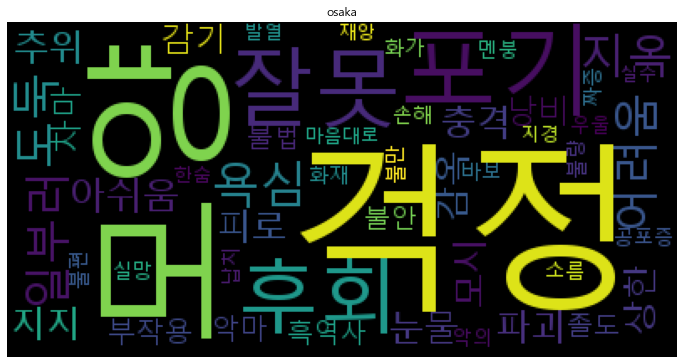

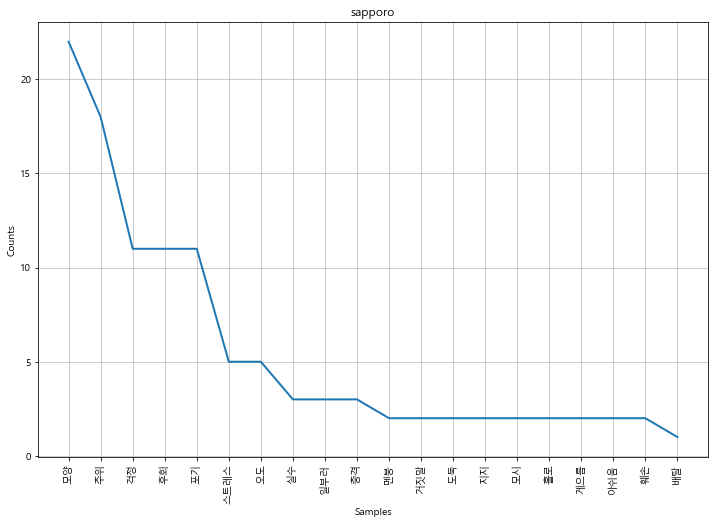

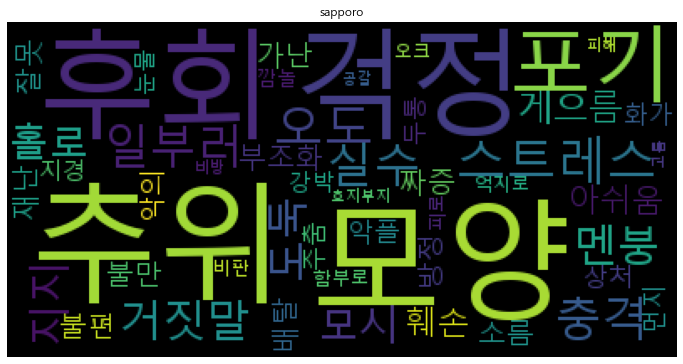

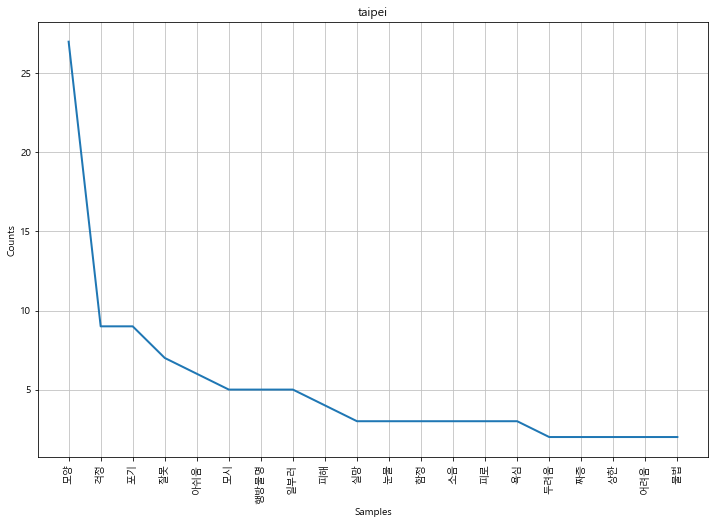

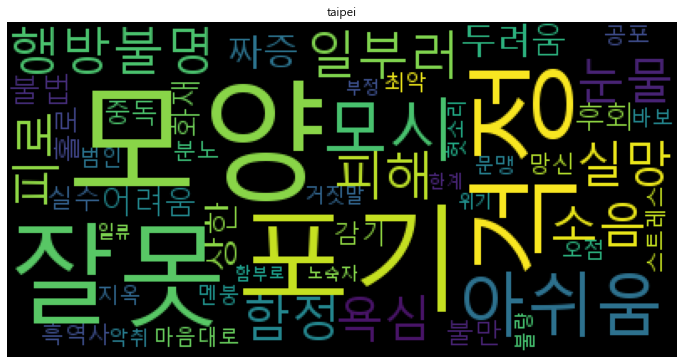

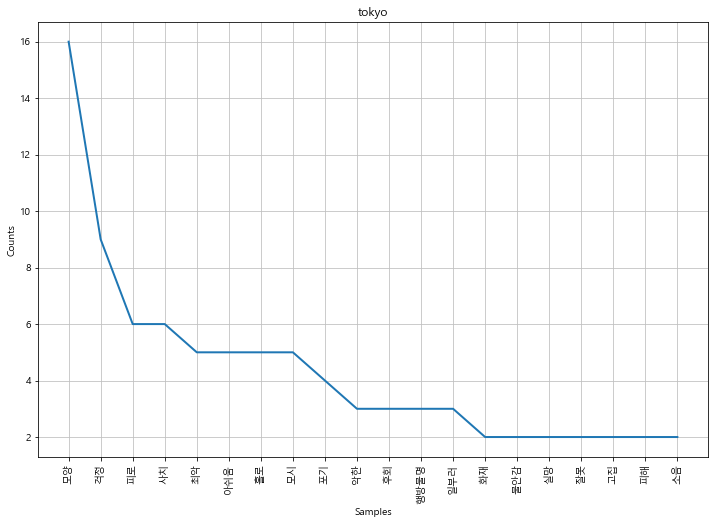

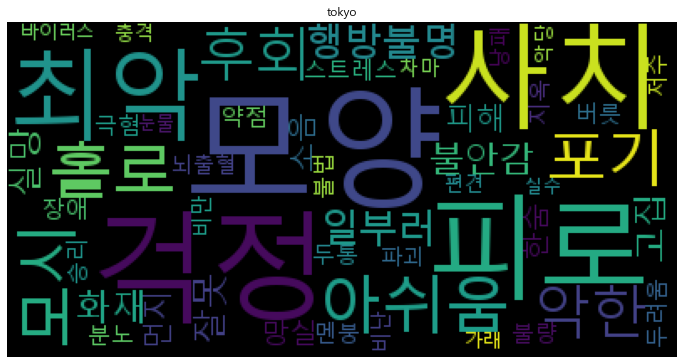

In [16]:
#부정단어
df = pd.read_csv('C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/도시별_긍부정지수_및_긍부정단어목록/긍부정단어목록.csv')

for n in range(10):
    text = str(df.iloc[:,:5]['score_mtwo_word'][n])+str(df.iloc[:,:4]['score_mone_word'][n])  #
    tokens_ko=okt.nouns(text)
    tokens_ko
    ko=nltk.Text(tokens_ko, name=city)

    plt.figure(figsize=(12,8))
    plt.title(city_list[n])
    ko.plot(20)
    #plt.show()

    #워드클라우드
    data = ko.vocab().most_common(50) #단어갯수 조절
    #airplain_mask=np.array(Image.open("C:/Users/twentystones/Desktop/사회연결망분석텀프로젝트/airplain.jfif"))
    wc=WordCloud(font_path='c:\windows\Fonts\malgun.ttf',background_color='black', relative_scaling=0.2,
                 stopwords=stop_words).generate_from_frequencies(dict(data))
    plt.figure(figsize=(12,8))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(city_list[n])
    #plt.show()

In [165]:
'''
#고치기 귀찮아서 넘김 필요하면 나중에 쓰기
#연어 : 단어들이 연결되서 사용되는거
from konlpy.tag import Kkma
from konlpy.corpus import kolaw
from konlpy.utils import pprint
from nltk import collocations #이웃사용된 연어사용

measures = collocations.BigramAssocMeasures()
tagged_words = Kkma().pos(text) #형태소분석한 결과가 형태소-품사 딕셔너리로 나옴

stopwords=[u'에게'] #u는 포맷정의래
words = [w for w, t in tagged_words]   #품사빼고 형태소만 words에 저장
finder = collocations.BigramCollocationFinder.from_words(words)
finder.apply_word_filter(lambda w:len(w)<2 or w in stopwords)  #두 단어 주요 키워드
finder.apply_freq_filter(4)   #최소 4번은 나온것
pprint(finder.nbest(measures.pmi,10))  #연어 사용지수높은 상위10개
'''

"\n#고치기 귀찮아서 넘김 필요하면 나중에 쓰기\n#연어 : 단어들이 연결되서 사용되는거\nfrom konlpy.tag import Kkma\nfrom konlpy.corpus import kolaw\nfrom konlpy.utils import pprint\nfrom nltk import collocations #이웃사용된 연어사용\n\nmeasures = collocations.BigramAssocMeasures()\ntagged_words = Kkma().pos(text) #형태소분석한 결과가 형태소-품사 딕셔너리로 나옴\n\nstopwords=[u'에게'] #u는 포맷정의래\nwords = [w for w, t in tagged_words]   #품사빼고 형태소만 words에 저장\nfinder = collocations.BigramCollocationFinder.from_words(words)\nfinder.apply_word_filter(lambda w:len(w)<2 or w in stopwords)  #두 단어 주요 키워드\nfinder.apply_freq_filter(4)   #최소 4번은 나온것\npprint(finder.nbest(measures.pmi,10))  #연어 사용지수높은 상위10개\n"